# CSCA 5642 Introduction to Deep Learning Week 5 Project

## 1. Brief description of the problem and data
### 1.1 Problem description
In this project, the aim is to train generative models to create images of dogs. According to the documentation, the Stanford Dogs dataset contains images of 120 breeds of dogs all over the world. To accomplish it, I will use GAN, namely Generative Adversarial Networks as my model in generate dog images. The dataset of this project is from:

Primary:
  Aditya Khosla, Nityananda Jayadevaprakash, Bangpeng Yao and Li Fei-Fei. Novel dataset for Fine-Grained Image Categorization. First Workshop on Fine-Grained Visual Categorization (FGVC), IEEE Conference on Computer Vision and Pattern Recognition (CVPR), 2011.  [pdf]  [poster]  [BibTex]

Secondary:
  J. Deng, W. Dong, R. Socher, L.-J. Li, K. Li and L. Fei-Fei, ImageNet: A Large-Scale Hierarchical Image Database. IEEE Computer Vision and Pattern Recognition (CVPR), 2009.  [pdf]  [BibTex]

### 1.2 Data description
This dataset has been built using images and annotation from ImageNet for the task of fine-grained image categorization. Contents of this dataset:

1) Number of categories: 120
2) Number of images: 20,580
3) Annotations: Class labels, Bounding boxes. The data of this project is from 

## 2. Exploratory Data Analysis (EDA) — Inspect, Visualize and Clean the Data
### 2.1 Data Inspection
First, I use the split files of train and test dataset to do some inspection.

In [5]:
import scipy.io

def load_mat_file(file_path):
    data = scipy.io.loadmat(file_path)
    return data

train_file_path = 'data/lists/train_list.mat'
test_file_path = 'data/lists/test_list.mat'

train_data = load_mat_file(train_file_path)
test_data = load_mat_file(test_file_path)

# Display the keys and explore the structure
print("Train Data Keys:", train_data.keys())
print("Test Data Keys:", test_data.keys())


Train Data Keys: dict_keys(['__header__', '__version__', '__globals__', 'file_list', 'annotation_list', 'labels'])
Test Data Keys: dict_keys(['__header__', '__version__', '__globals__', 'file_list', 'annotation_list', 'labels'])


Next, I will check for uniformity

In [13]:
from PIL import Image
import numpy as np

# Example to load one image to get details
sample_image_path = 'data/images/' + train_data['file_list'][0][0][0]
image = Image.open(sample_image_path)

# Analyze image properties
image_format = image.format
image_mode = image.mode  # This tells us the number of channels
image_size = image.size

# Check dimensions across a few images
dimensions = []
for i in range(10):  # Check first 10 images
    image_path = 'data/images/' + train_data['file_list'][i][0][0]
    image = Image.open(image_path)
    dimensions.append(image.size)

# Check if all dimensions are the same
same_dimensions = all(x == dimensions[0] for x in dimensions)

# Output the findings
image_format, image_mode, image_size, same_dimensions


('JPEG', 'RGB', (360, 300), False)

To enhance our understanding of the ImageNet Dogs dataset, we will conduct a detailed exploratory data analysis (EDA). The following metrics and visualizations will help us better understand the characteristics of the dataset:

### 2.2 Analysis Plan:
1. **Plot Histograms of Image Dimensions**: This will help visualize the distribution of image sizes across the dataset, which is crucial for deciding on preprocessing steps.
2. **Examine Pixel Intensity Distributions**: By understanding the distribution of pixel intensities, we can make informed decisions about normalizing or standardizing the images.
3. **Label Distribution Analysis**: Analyzing the distribution of labels will help us identify if there's class imbalance which might affect model training.
4. **Visualize Random Sample Images**: Visual inspection can reveal additional qualities of the dataset such as noise levels, unusual objects, or other image quality issues.

### 2.3 Step-by-Step Implementation:



In [17]:
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image
import random

# Base directory where images are stored
base_image_dir = 'data/images/'

# Function to load an image given a path
def load_image(image_path):
    return Image.open(image_path)

# Function to extract dimensions from a list of image file paths
def get_image_dimensions(image_paths):
    dimensions = []
    for path in image_paths:
        image = load_image(path)
        dimensions.append(image.size)
    return dimensions

# Plot histograms of image dimensions
def plot_image_dimensions(dimensions):
    widths, heights = zip(*dimensions)  # Unzip the list of dimensions
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.hist(widths, bins=20, color='blue', alpha=0.7)
    plt.title('Histogram of Image Widths')
    plt.xlabel('Width')
    plt.ylabel('Frequency')

    plt.subplot(1, 2, 2)
    plt.hist(heights, bins=20, color='green', alpha=0.7)
    plt.title('Histogram of Image Heights')
    plt.xlabel('Height')
    plt.ylabel('Frequency')
    plt.show()

# Function to plot pixel intensity distribution of an image
def plot_pixel_intensities(image):
    plt.figure()
    plt.hist(np.array(image).flatten(), bins=50, color='gray', alpha=0.7)
    plt.title('Pixel Intensity Distribution')
    plt.xlabel('Pixel Values')
    plt.ylabel('Frequency')
    plt.show()

# Function to plot label distribution
def plot_label_distribution(labels):
    plt.figure()
    plt.hist(labels, bins=len(set(labels)), color='red', alpha=0.7)
    plt.title('Label Distribution Across Training Set')
    plt.xlabel('Labels')
    plt.ylabel('Frequency')
    plt.show()

# Visualize random sample images
def visualize_sample_images(base_dir, file_list, num_images=5):
    fig, axes = plt.subplots(1, num_images, figsize=(15, 3))
    for ax in axes:
        random_idx = random.randint(0, len(file_list) - 1)
        img_path = os.path.join(base_dir, file_list[random_idx][0][0])
        img = load_image(img_path)
        ax.imshow(img)
        ax.axis('off')
    plt.show()


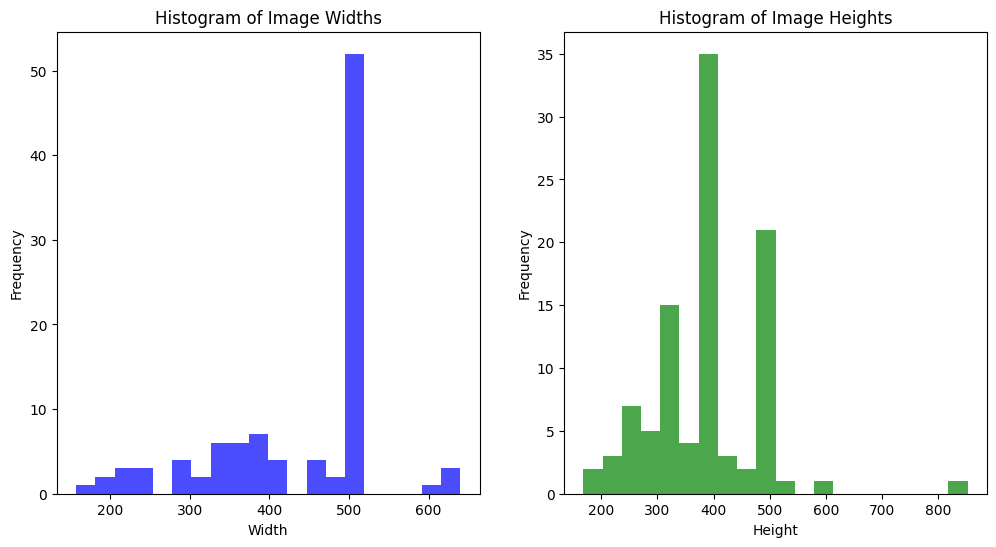

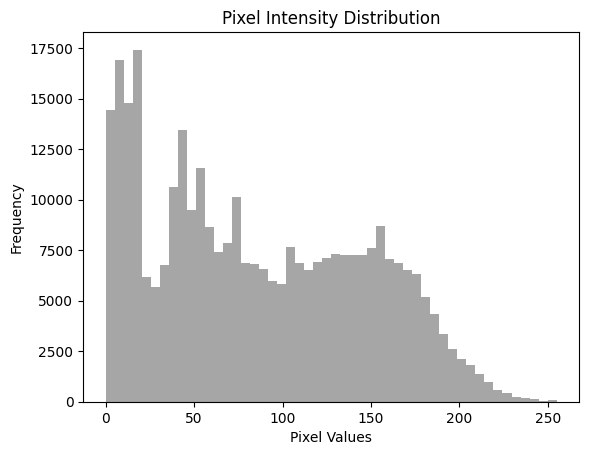

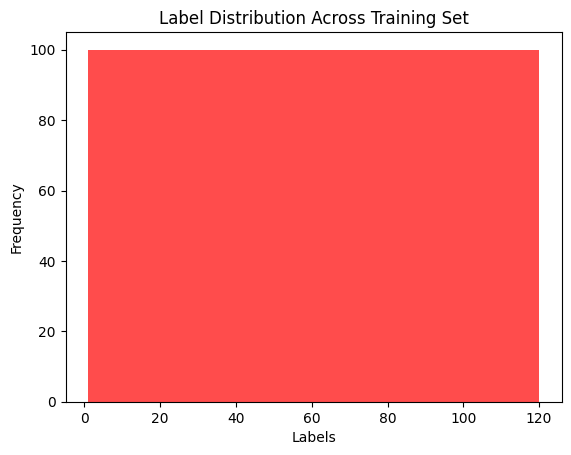

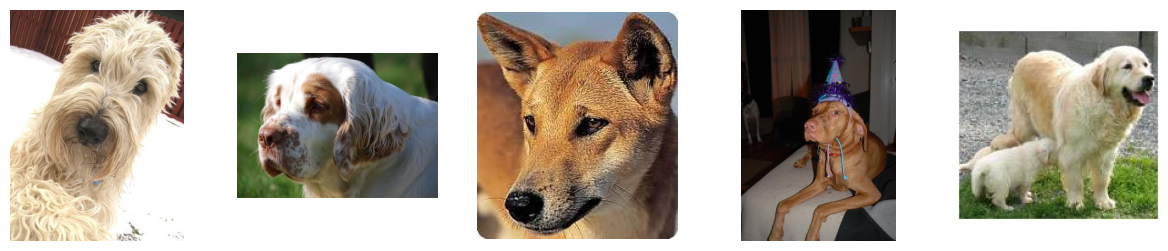

In [18]:
# Extracting sample image paths for EDA
sample_image_paths = [os.path.join(base_image_dir, train_data['file_list'][i][0][0]) for i in range(100)]  # Using 100 images for EDA

# Getting dimensions
dimensions = get_image_dimensions(sample_image_paths)

# Plot dimensions
plot_image_dimensions(dimensions)

# Load a sample image and plot pixel intensities
sample_image = load_image(sample_image_paths[0])
plot_pixel_intensities(sample_image)

# Extract labels and plot their distribution
labels = [label[0] for label in train_data['labels']]
plot_label_distribution(labels)

# Visualize some random images
visualize_sample_images(base_image_dir, train_data['file_list'], num_images=5)
